In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE
import warnings
warnings.simplefilter("ignore")

In [2]:
data1 = []
for line in open("modcloth_final_data.json", "r"):
    data1.append(json.loads(line))

df1 = pd.DataFrame.from_dict(data1)

In [3]:
df1.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [4]:
val = df1.category.value_counts(0)
val = val.reset_index()
val

,index,category
0,new,21488
1,tops,20364
2,dresses,18650
3,bottoms,15266
4,outerwear,4223
5,sale,2524
6,wedding,275


In [5]:
data2 = []
for line in open("renttherunway_final_data.json", "r"):
    data2.append(json.loads(line))

df2 = pd.DataFrame.from_dict(data2)
df2

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015"


In [6]:
df2.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [7]:
series = df2.category.value_counts(0)

In [8]:
series = series.reset_index()

# Handle Missing Values

In [9]:
df = df2.copy()

In [10]:
df = df.dropna(subset=["rating"])
df = df.drop(columns=["rented for", "bust size", "body type", "review_date", "user_id"])

In [11]:
le = LabelEncoder()
df["weight"] = le.fit_transform(df["weight"].astype("str"))
nan_code = le.transform(["nan"])[0]
df["weight"].replace(nan_code, np.nan, inplace=True)

In [12]:
df["age"] = pd.to_numeric(df["age"])
df["weight"] = df["weight"].fillna(df.groupby("size")["weight"].transform("median"))
df["age"] = df["age"].fillna(df.groupby("category")["age"].transform("median"))

In [13]:
df["fit"] = le.fit_transform(df["fit"])
df["height"] = le.fit_transform(df["height"])
df["category"] = le.fit_transform(df["category"])
df["item_id"] = le.fit_transform(df["item_id"])
df["rating"] = le.fit_transform(df["rating"])

In [14]:
for c in df.columns:
    print(f"{c}\t ---- {df[c].dtype}")

fit	 ---- int32
item_id	 ---- int32
weight	 ---- float64
rating	 ---- int32
review_text	 ---- object
review_summary	 ---- object
category	 ---- int32
height	 ---- int32
size	 ---- int64
age	 ---- float64


In [15]:
df

,fit,item_id,weight,rating,review_text,review_summary,category,height,size,age
0,0,2802,37.0,0,An adorable romper! Belt and zipper were a lit...,So many compliments!,44,16,14,28.0
1,0,1195,32.0,0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,20,14,12,36.0
2,0,144,20.0,0,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,45,12,4,116.0
3,0,562,35.0,4,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,16,13,8,34.0
4,0,5081,45.0,0,I have always been petite in my upper body and...,Was in love with this dress !!!,20,17,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,2788,40.0,0,Fit like a glove!,LOVE IT!!! First Item Im thinking of buying!,26,17,8,42.0
192540,0,5213,0.0,0,The pattern contrast on this dress is really s...,LOVE it!,16,7,4,29.0
192541,0,5215,35.0,3,"Like the other DVF wraps, the fit on this is f...","Loud patterning, flattering fit",16,16,8,31.0
192542,0,562,65.0,0,This dress was PERFECTION. it looked incredib...,loved this dress it was comfortable and photog...,16,14,16,31.0


In [16]:
df.corr()

,fit,item_id,weight,rating,category,height,size,age
fit,1.000000,0.011883,0.016900,0.181939,0.000309,-0.000976,0.065427,0.001652
item_id,0.011883,1.000000,-0.034448,-0.000157,0.077749,0.001027,-0.040208,0.001635
weight,0.016900,-0.034448,1.000000,0.029604,-0.012358,0.154688,0.790628,0.059421
rating,0.181939,-0.000157,0.029604,1.000000,0.016062,-0.010960,0.041967,0.020168
category,0.000309,0.077749,-0.012358,0.016062,1.000000,-0.003274,-0.005634,0.024654
height,-0.000976,0.001027,0.154688,-0.010960,-0.003274,1.000000,0.137589,-0.002145
size,0.065427,-0.040208,0.790628,0.041967,-0.005634,0.137589,1.000000,0.155137
age,0.001652,0.001635,0.059421,0.020168,0.024654,-0.002145,0.155137,1.000000


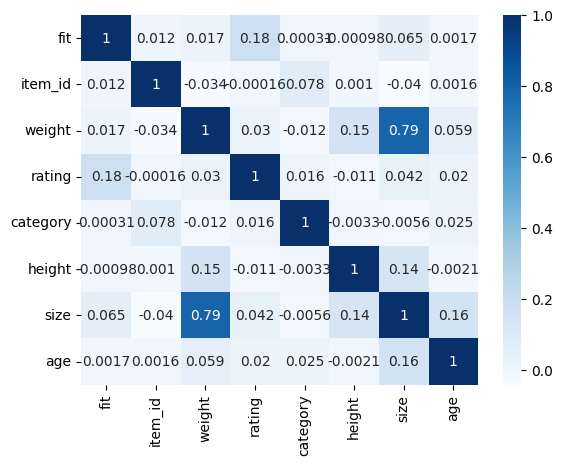

In [17]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [18]:
df["rating"].value_counts()

0    124537
4     53391
3     10697
2      2791
1      1046
Name: rating, dtype: int64

In [19]:
df.dtypes

fit                 int32
item_id             int32
weight            float64
rating              int32
review_text        object
review_summary     object
category            int32
height              int32
size                int64
age               float64
dtype: object

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, [0, 1, 2, 6, 7, 8, 9]], df.iloc[:, 3])

In [26]:
x_train.shape, x_test.shape

((144346, 7), (48116, 7))

In [21]:
hashmap = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "MLP Classifier": MLPClassifier()
}

for clf, model in hashmap.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{clf}:\n==========\nMSE: {MSE(y_test, y_pred)}\nMAE: {MAE(y_test, y_pred)}")
    print("====================")

Logistic Regression:
MSE: 5.036412004322886
MAE: 1.3196026269847867
Decision Tree Classifier:
MSE: 6.1594687837725495
MAE: 1.655104331199601
Random Forest Classifier:
MSE: 5.259726494305428
MAE: 1.381266106908305
XGBoost Classifier:
MSE: 4.892198021448167
MAE: 1.2840427300689998
MLP Classifier:
MSE: 5.1273588827001415
MAE: 1.3423393465791005


## ANOVA F-test values

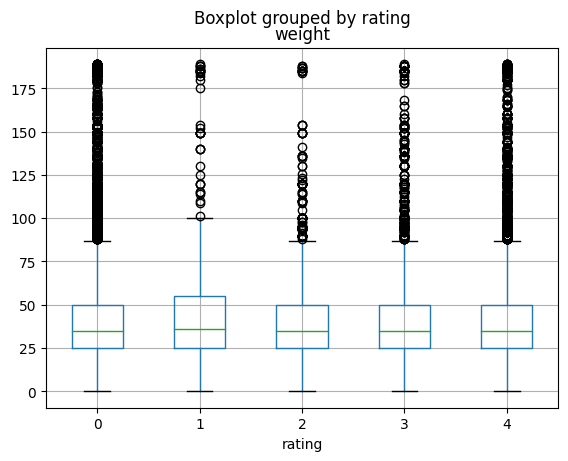

In [23]:
_ = df.boxplot("weight", by="rating")